---
# **Group 15**
## - **Bishal Ghosh - (23200342)** (Primary contributor to this code)
## - **Stebin Sebastian - (23200018)** (Secondary contributor to this code)
## - **Thapanee Sasuwan - (23201498)** (Looked after the QA of the code)
## - **Ambarish Tirumalai - (23201747)** (Looked after the code comments and Markdown)
---

---
##### The aim of this analysis is to investigate a range of health-related factors and their interconnections to classify diabetes accurately. These factors include aspects such as 1. age, 2. gender, 3. body mass index (BMI),  4. hypertension, 5. heart disease, 6. smoking history, 7. HbA1c level, and 8. blood glucose level. This comprehensive examination will not only provide insights into the patterns and trends in diabetes risk but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence diabetes occurrence and progression, crucial knowledge for improving patient care and outcomes in this increasingly critical area of healthcare.

In [133]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 
import os
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

##### Column description
- <span style="text-decoration: underline;">**Age**</span><br><span style="font-size:1.1em;">Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases.</span>
- <span style="text-decoration: underline;">**Gender**</span><br><span style="font-size:1.1em;">Gender can play a role in diabetes risk, although the effect may vary.</span>
- <span style="text-decoration: underline;">**Body Mass Index (BMI)**</span><br><span style="font-size:1.1em;">BMI is a measure of body fat based on a person's height and weight.</span>
- <span style="text-decoration: underline;">**Hypertension**<br></span><span style="font-size:1.1em;">The two conditions share common risk factors and can contribute to each other's development.</span>
- <span style="text-decoration: underline;">**Heart Disease**<br></span><span style="font-size:1.1em;">Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes.</span>
- <span style="text-decoration: underline;">**Smoking History**<br></span><span style="font-size:1.1em;"> Smoking is a modifiable risk factor for diabetes.</span>
- <span style="text-decoration: underline;">**HbA1c Level**<br></span><span style="font-size:1.1em;">HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months.</span>
- <span style="text-decoration: underline;">**Bloof Glucose Level**</span><br><span style="font-size:1.1em;">Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time.</span>
- <span style="text-decoration: underline;">**Diabetes**</span><br><span style="font-size:1.1em;">0 = Diabetes negative, 1 = Diabetes positive.</span>

In [141]:
current_directory = os.getcwd()
file_name = "/Diseases Data/diabetes_prediction_dataset.csv"
csv_path = current_directory+file_name
df = pd.read_csv(csv_path)
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
5,Female,20.00,0,0,never,27.32,6.60,85,0
6,Female,44.00,0,0,never,19.31,6.50,200,1
7,Female,79.00,0,0,No Info,23.86,5.70,85,0
8,Male,42.00,0,0,never,33.64,4.80,145,0
9,Female,32.00,0,0,never,27.32,5.00,100,0


In [142]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape,"\n")
df = df.drop_duplicates()
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")
# Checking null values
print("\n", df.isnull().sum(),"\n")
# Remove Unneccessary value 
df = df[df['gender'] != 'Other']
df.describe().style.format("{:.2f}")

number of duplicate rows:  (3854, 9) 

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values

 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64 



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


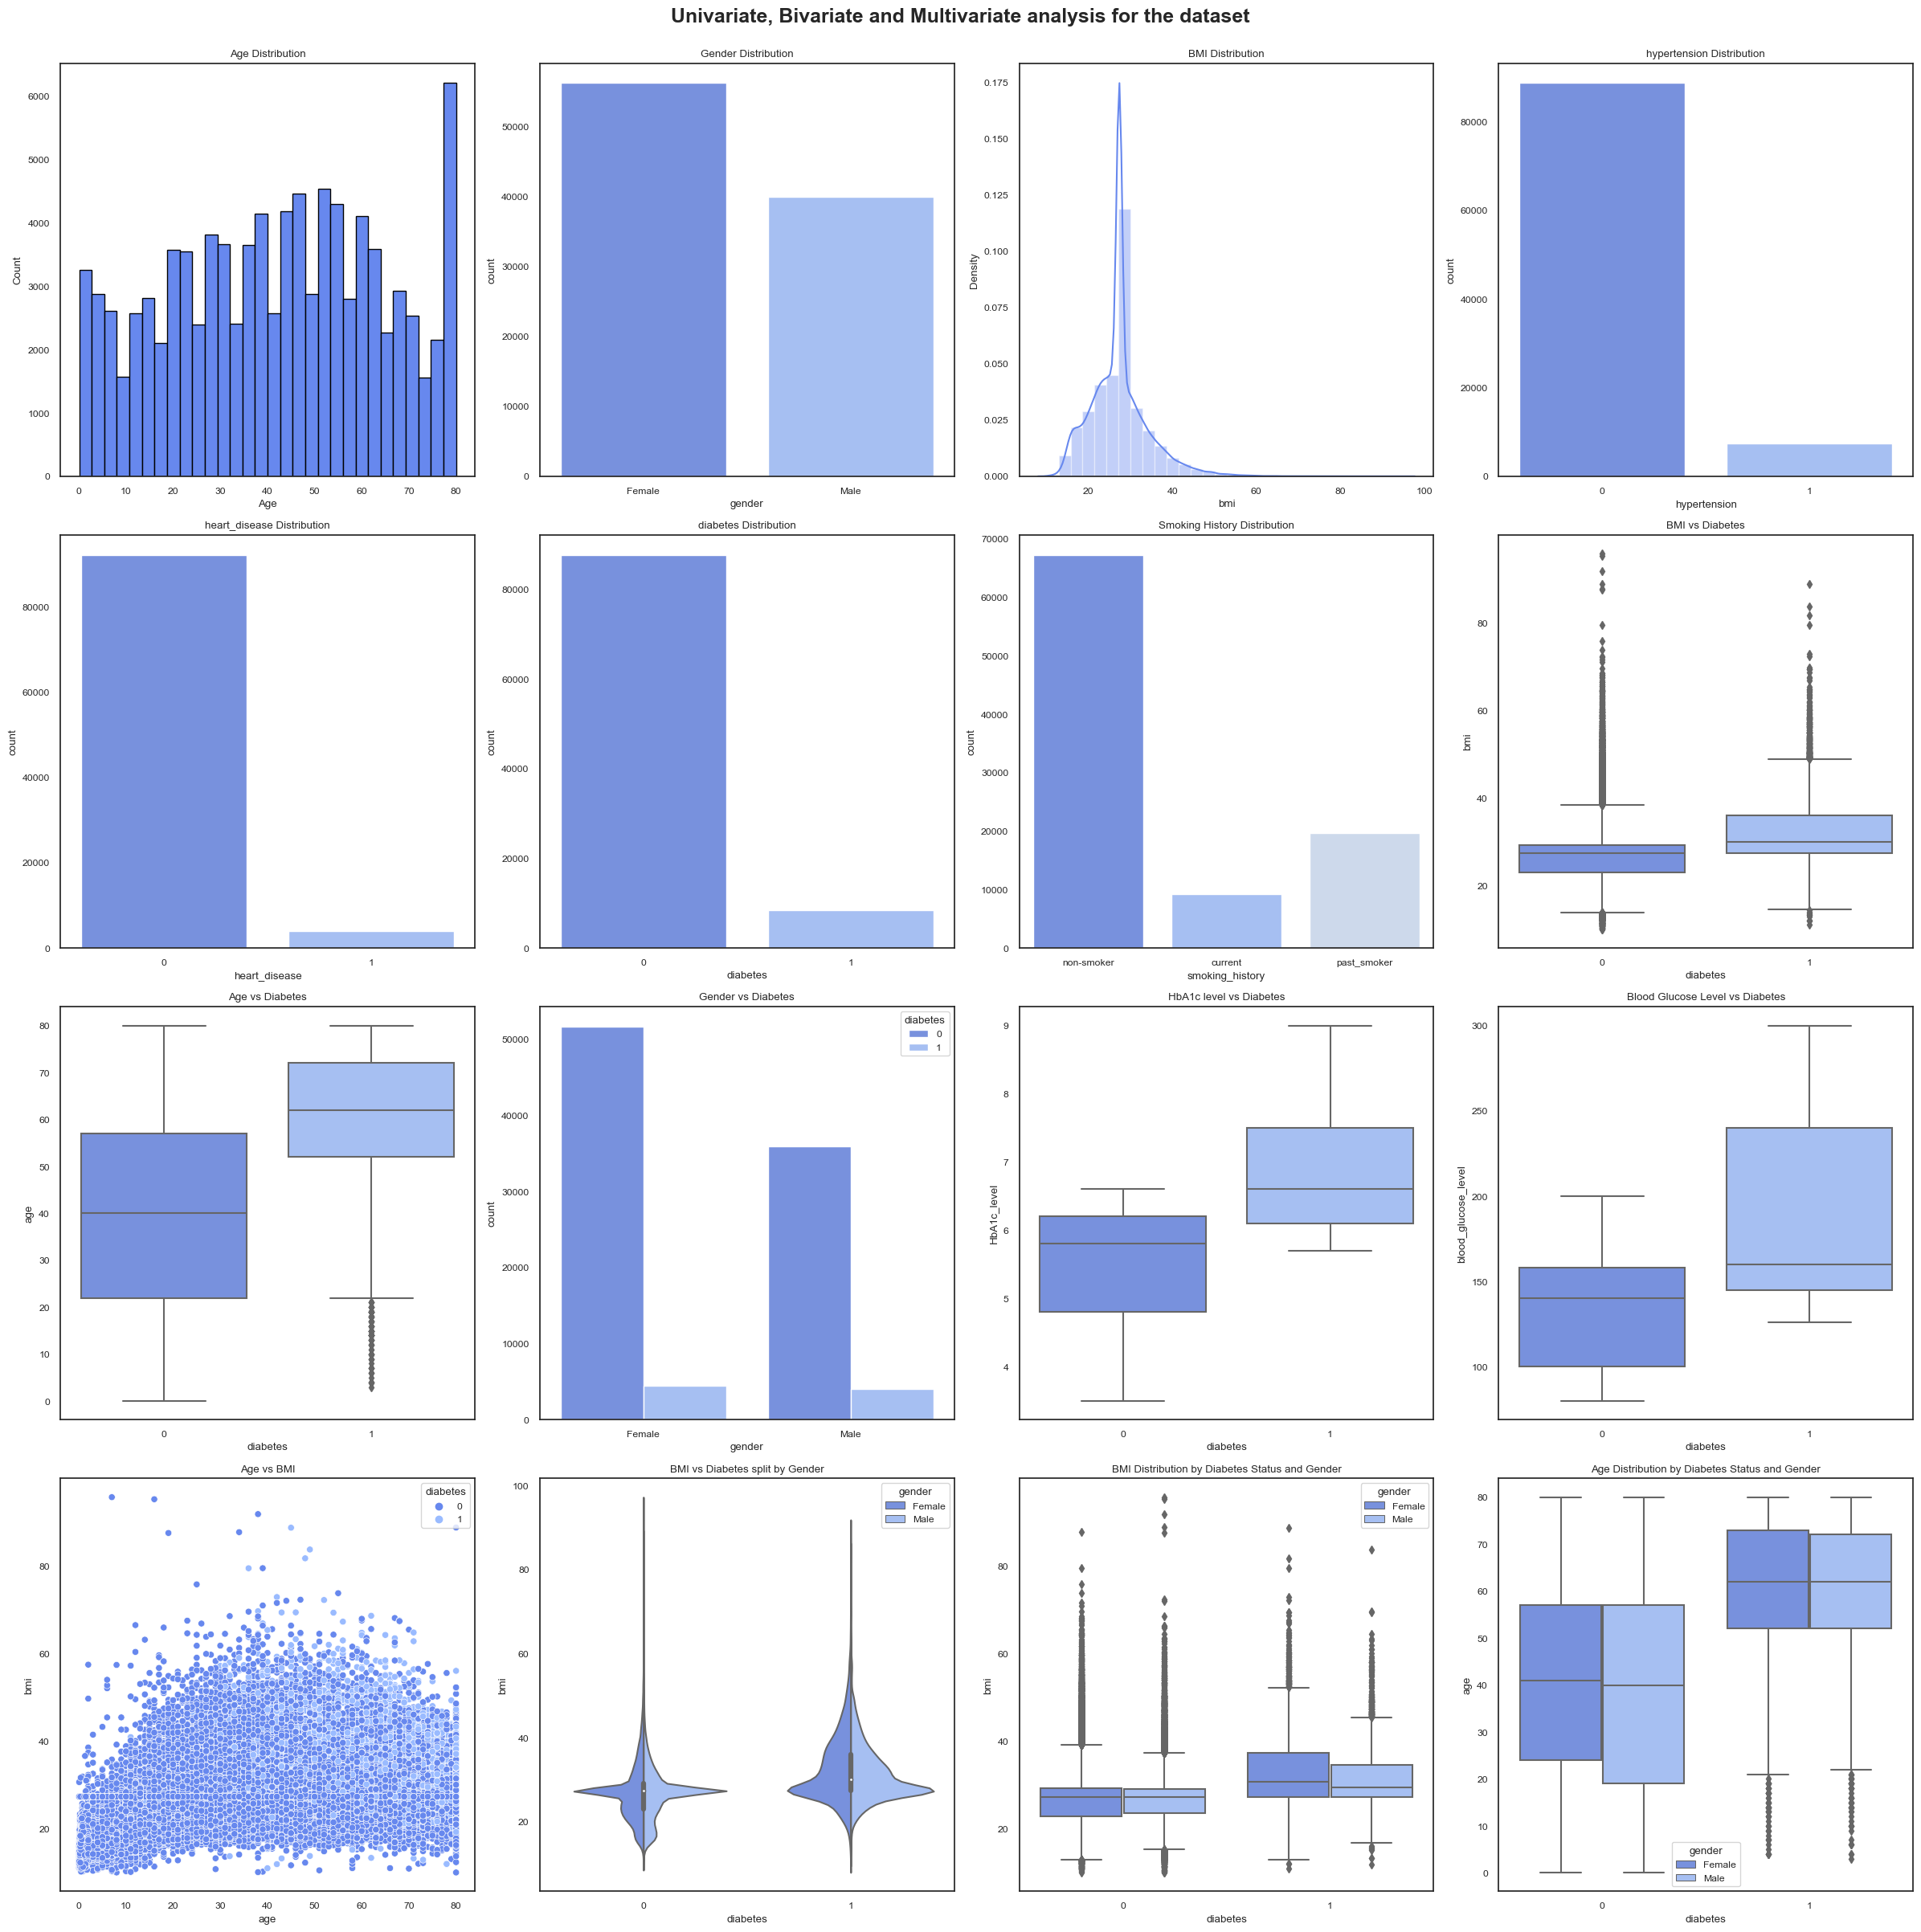

In [158]:

fig, axes = plt.subplots(4, 4, figsize=(24, 24))
sns.set_palette("coolwarm")
# Flatten the axes array to easily access each subplot
axes = axes.flatten()
fig.suptitle('Univariate, Bivariate and Multivariate analysis for the dataset', fontsize=18, fontweight='bold', ha='center',  y=1.000001)
#fig.subplots_adjust(top=5)
# Univariate analysis
# Histogram for age
axes[0].hist(df['age'], bins=30, edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
# Bar plot for gender
sns.countplot(x='gender', data=df, ax=axes[1])
axes[1].set_title('Gender Distribution')
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30, ax=axes[2])
axes[2].set_title('BMI Distribution')
# Count plots for binary variables
binary_vars = ['hypertension', 'heart_disease', 'diabetes']
for i, col in enumerate(binary_vars):
    sns.countplot(x=col, data=df, ax=axes[i+3])
    axes[i+3].set_title(f'{col} Distribution')
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df, ax=axes[6])
axes[6].set_title('Smoking History Distribution')
# Bivariate analysis 
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df, ax=axes[7])
axes[7].set_title('BMI vs Diabetes')
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df, ax=axes[8])
axes[8].set_title('Age vs Diabetes')
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df, ax=axes[9])
axes[9].set_title('Gender vs Diabetes')
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, ax=axes[10])
axes[10].set_title('HbA1c level vs Diabetes')
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, ax=axes[11])
axes[11].set_title('Blood Glucose Level vs Diabetes')
# Multivariate analysis
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, ax=axes[12])
axes[12].set_title('Age vs BMI')
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df, ax=axes[13])
axes[13].set_title('BMI vs Diabetes split by Gender')
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df, ax=axes[14])
axes[14].set_title('BMI Distribution by Diabetes Status and Gender')
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df, ax=axes[15])
axes[15].set_title('Age Distribution by Diabetes Status and Gender')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the combined plot
plt.show()

In [144]:
# Changing the smoking_status categories for ease of grouping
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)
# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [145]:
data = df.copy()
#Encoding data for "Gender by female and male" and "smoking_history by current, non-smoker and past-smoker"
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')
# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
0,80.00,0,1,25.19,6.60,140,0,True,False,False,True,False
1,54.00,0,0,27.32,6.60,80,0,True,False,False,True,False
2,28.00,0,0,27.32,5.70,158,0,False,True,False,True,False
3,36.00,0,0,23.45,5.00,155,0,True,False,True,False,False
4,76.00,1,1,20.14,4.80,155,0,False,True,True,False,False


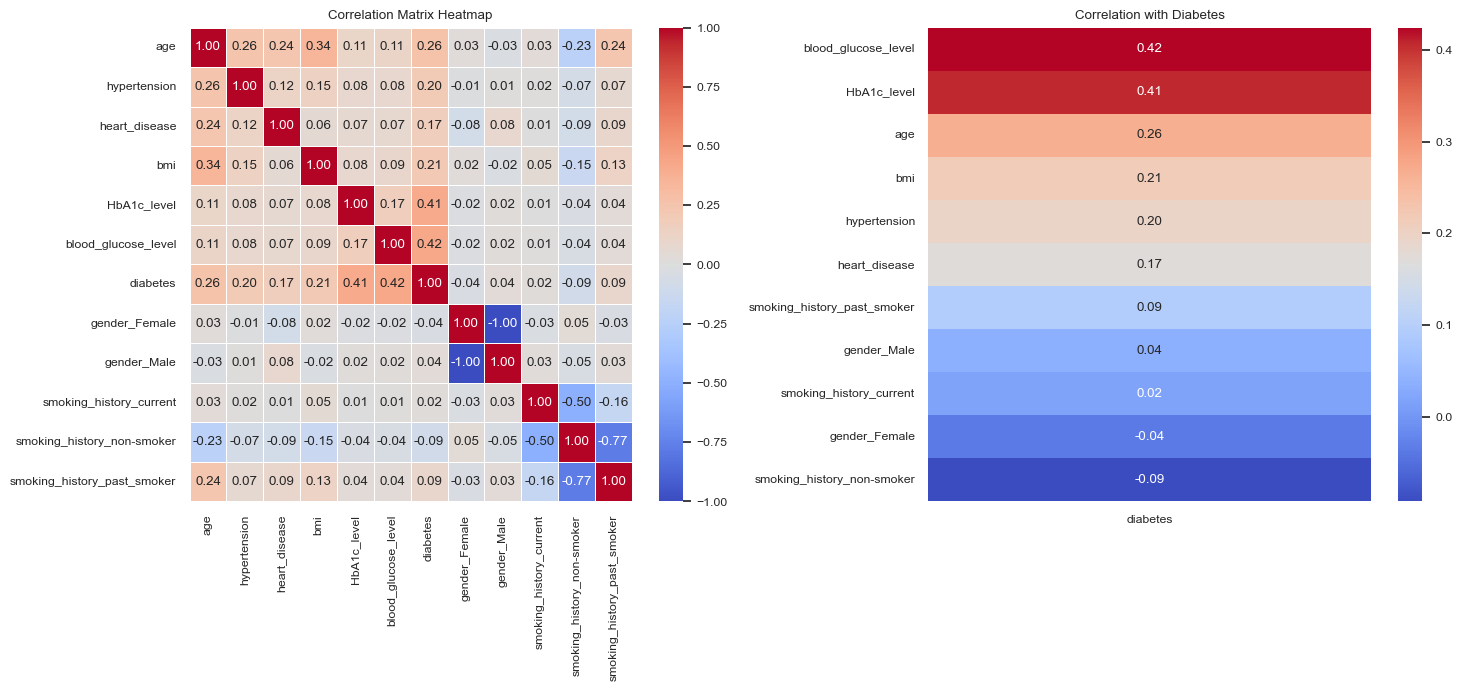

In [146]:
# Compute the correlation matrix
correlation_matrix = data.corr()
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Plot the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', ax=axes[0])
axes[0].set_title("Correlation Matrix Heatmap")
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axes[1])
axes[1].set_title('Correlation with Diabetes')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

---
## Preprocessing the data & Running ML Algo's
---

#### Imbalance adjusting 
##### From the EDA ,the dataset is imbalanced (with 9% positive cases for diabetes and 91% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

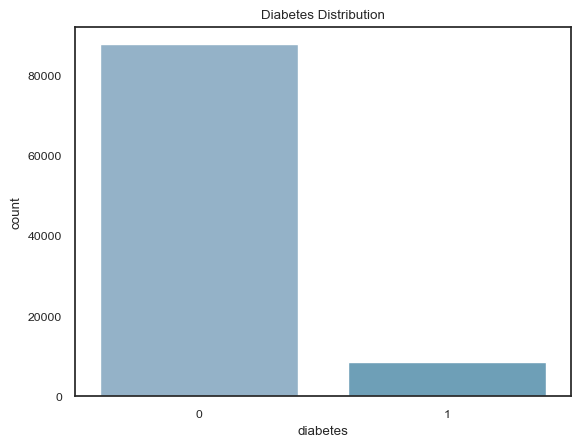

In [147]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

#### Preprocessing : Scaler
##### Z-score normalization & train the Random Forest Classifier. We use a RandomForestClassifier, which is a popular algorithm for classification tasks. The model's hyperparameters are tuned using GridSearchCV , which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on cross-validation.

##### **max_depth of 10:** This indicates that the maximum depth of the trees in the forest is 10 levels. Constraining the depth of the tree helps in reducing overfitting. It appears from this result that a medium-complexity tree works best for our data. Too much complexity (a deeper tree) may capture noise, and too little (a shallower tree) may not capture the underlying structure of the data.

##### **min_samples_leaf of 2:** This means that each leaf (the end node of a decision tree, where predictions are made) must contain at least two samples. This parameter, like max_depth, is a way to control overfitting. By requiring at least two samples to make a prediction, the model prevents fitting to outliers or noise in the training data.

##### **min_samples_split of 2:** This tells us that a node must contain at least two samples in order to be split (to create two child nodes). Similar to the min_samples_leaf parameter, this can help control overfitting.

##### **n_estimators of 50:** This is the number of decision trees in the forest. The Random Forest algorithm works by averaging the predictions of many decision trees to make a final prediction, which helps reduce overfitting and variance. In this case, it seems that having 50 trees in the forest gives us the best performance.



In [149]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [150]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [151]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [152]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


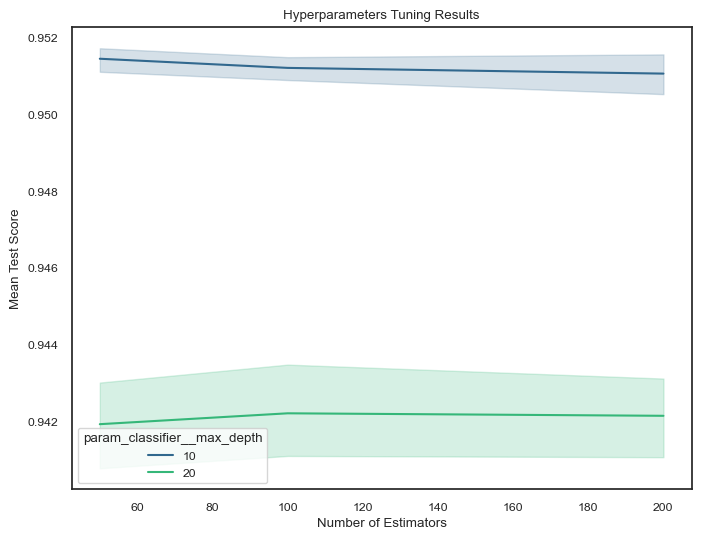

In [153]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

Model Accuracy:  0.9487152813897847
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



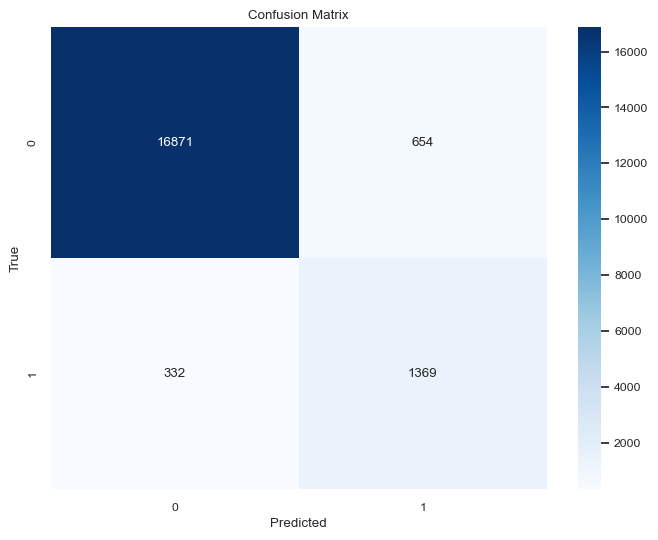

In [154]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level        0.43
3           blood_glucose_level        0.33
0                           age        0.13
1                           BMI        0.06
4                  hypertension        0.03
5                 heart_disease        0.02
9    smoking_history_non-smoker        0.00
10  smoking_history_past_smoker        0.00
6                 gender_Female        0.00
7                   gender_Male        0.00
8       smoking_history_current        0.00


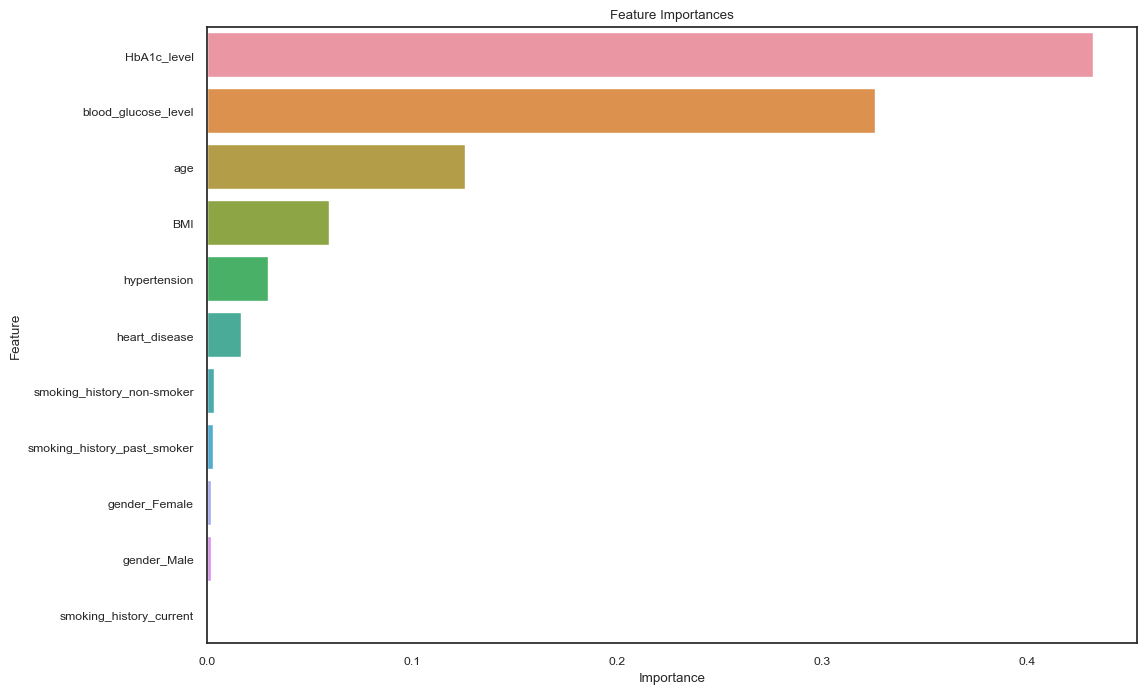

In [155]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()